In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 1. Clean data

In [4]:
# Load data
df = pd.read_excel('data/raw/refinitiv_data.xlsx', engine='openpyxl')
df

,Identifier,Company Name,ISIN,Ticker,Country of Exchange,Financial Period Absolute,Financial Period Relative,CSR URL,Product Access Low Price,Community Lending and Investments Score,Obesity Risk,Policy Employee Health & Safety,Policy Supply Chain Health & Safety,Health & Safety Training,Supply Chain Health & Safety Training,HIV-AIDS Program,Policy Skills Training,Policy Career Development,Employees With Disabilities Score,Training Costs Per Employee Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Human Rights Policy,Policy Water Efficiency,Toxic Chemicals Reduction,Targets Water Efficiency,Water Use To Revenues USD Score,Waste Reduction Initiatives,Waste Recycling Ratio,Biodiversity Impact Reduction,Water Technologies,Renewable Energy Use,Policy Energy Efficiency,Renewable/Clean Energy Products,Product Environmental Responsible Use,Policy Child Labor,Policy Forced Labor,Policy Human Rights,Environmental Innovation Score,Product Sales at Discount to Emerging Markets,Environmental Materials Sourcing,Policy Sustainable Packaging,Policy Environmental Supply Chain,Take-back and Recycling Initiatives,CSR Sustainability Reporting,Resource Use Score,Emissions Score,Climate Change Commercial Risks Opportunities,Environmental Project Financing,Fundamental Human Rights ILO UN,Policy Bribery and Corruption
0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,FY2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,0.0,False,True,False,True,False,False,True,True,0.0,0.000000,True,False,True,True,False,False,0.000000,True,0.000,False,False,True,True,False,False,True,True,True,0.0,False,False,False,True,False,True,21.025641,78.436019,True,False,True,True
1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,FY2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,0.0,False,True,False,True,False,False,True,True,0.0,0.000000,True,False,True,True,True,True,63.114754,True,35.499,True,False,True,True,False,True,True,True,True,50.0,False,True,True,True,True,True,95.608108,97.463768,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,YRI.TO,Yamana Gold Inc,CA98462Y1007,YRI,Canada,FY2010,FY-10,http://www.yamana.com/Theme/NewYamana/files/YAMANA%20CSR-E%2017-08-11b.pdf,False,0.0,False,True,False,True,False,True,True,True,0.0,21.794872,False,False,True,True,False,True,60.891089,True,28.500,True,False,True,True,False,False,False,False,False,0.0,False,False,False,True,False,True,97.668394,87.760417,True,False,False,True
11451,YUM.N,Yum! Brands Inc,US9884981013,YUM,United States of America,FY2010,FY-10,http://www.yum.com/responsibility/,False,0.0,False,True,True,True,False,True,True,True,0.0,0.000000,True,False,True,True,False,True,0.000000,True,0.000,False,False,True,True,False,False,False,False,False,0.0,False,True,True,True,False,True,91.911765,38.281250,False,False,False,True


In [5]:
# Check datatypes: 43 ESG metric columns, from which 8 contain float values and 35 contain bool values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11452 entries, 0 to 11451
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Identifier                                     11452 non-null  object 
 1   Company Name                                   11452 non-null  object 
 2   ISIN                                           11452 non-null  object 
 3   Ticker                                         11452 non-null  object 
 4   Country of Exchange                            11452 non-null  object 
 5   Financial Period Absolute                      11452 non-null  object 
 6   Financial Period Relative                      11452 non-null  object 
 7   CSR URL                                        11124 non-null  object 
 8   Product Access Low Price                       11452 non-null  bool   
 9   Community Lending and Investments Score        114

In [6]:
# Check for missing values
for column in df.columns:
    if sum(df[column].isna()) > 0:
        print(column + ' has ' + str(sum(df[column].isna())) + ' missing values' )
# Don't remove rows without URL because the URL can possibly be added later

CSR URL has 328 missing values


In [7]:
# Remove duplicates based on URL (but keep rows without URL)
df = df[~(df['CSR URL'].notna() & df['CSR URL'].duplicated(keep='first'))]
df

,Identifier,Company Name,ISIN,Ticker,Country of Exchange,Financial Period Absolute,Financial Period Relative,CSR URL,Product Access Low Price,Community Lending and Investments Score,Obesity Risk,Policy Employee Health & Safety,Policy Supply Chain Health & Safety,Health & Safety Training,Supply Chain Health & Safety Training,HIV-AIDS Program,Policy Skills Training,Policy Career Development,Employees With Disabilities Score,Training Costs Per Employee Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Human Rights Policy,Policy Water Efficiency,Toxic Chemicals Reduction,Targets Water Efficiency,Water Use To Revenues USD Score,Waste Reduction Initiatives,Waste Recycling Ratio,Biodiversity Impact Reduction,Water Technologies,Renewable Energy Use,Policy Energy Efficiency,Renewable/Clean Energy Products,Product Environmental Responsible Use,Policy Child Labor,Policy Forced Labor,Policy Human Rights,Environmental Innovation Score,Product Sales at Discount to Emerging Markets,Environmental Materials Sourcing,Policy Sustainable Packaging,Policy Environmental Supply Chain,Take-back and Recycling Initiatives,CSR Sustainability Reporting,Resource Use Score,Emissions Score,Climate Change Commercial Risks Opportunities,Environmental Project Financing,Fundamental Human Rights ILO UN,Policy Bribery and Corruption
0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,FY2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,0.0,False,True,False,True,False,False,True,True,0.0,0.000000,True,False,True,True,False,False,0.000000,True,0.000,False,False,True,True,False,False,True,True,True,0.0,False,False,False,True,False,True,21.025641,78.436019,True,False,True,True
1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,FY2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,0.0,False,True,False,True,False,False,True,True,0.0,0.000000,True,False,True,True,True,True,63.114754,True,35.499,True,False,True,True,False,True,True,True,True,50.0,False,True,True,True,True,True,95.608108,97.463768,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,YRI.TO,Yamana Gold Inc,CA98462Y1007,YRI,Canada,FY2010,FY-10,http://www.yamana.com/Theme/NewYamana/files/YAMANA%20CSR-E%2017-08-11b.pdf,False,0.0,False,True,False,True,False,True,True,True,0.0,21.794872,False,False,True,True,False,True,60.891089,True,28.500,True,False,True,True,False,False,False,False,False,0.0,False,False,False,True,False,True,97.668394,87.760417,True,False,False,True
11451,YUM.N,Yum! Brands Inc,US9884981013,YUM,United States of America,FY2010,FY-10,http://www.yum.com/responsibility/,False,0.0,False,True,True,True,False,True,True,True,0.0,0.000000,True,False,True,True,False,True,0.000000,True,0.000,False,False,True,True,False,False,False,False,False,0.0,False,True,True,True,False,True,91.911765,38.281250,False,False,False,True


In [8]:
# Transform 'Financial Period Absolute' column to integer
df['Financial Period Absolute'] = df['Financial Period Absolute'].str.replace('FY', '').astype(int)
df

,Identifier,Company Name,ISIN,Ticker,Country of Exchange,Financial Period Absolute,Financial Period Relative,CSR URL,Product Access Low Price,Community Lending and Investments Score,Obesity Risk,Policy Employee Health & Safety,Policy Supply Chain Health & Safety,Health & Safety Training,Supply Chain Health & Safety Training,HIV-AIDS Program,Policy Skills Training,Policy Career Development,Employees With Disabilities Score,Training Costs Per Employee Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Human Rights Policy,Policy Water Efficiency,Toxic Chemicals Reduction,Targets Water Efficiency,Water Use To Revenues USD Score,Waste Reduction Initiatives,Waste Recycling Ratio,Biodiversity Impact Reduction,Water Technologies,Renewable Energy Use,Policy Energy Efficiency,Renewable/Clean Energy Products,Product Environmental Responsible Use,Policy Child Labor,Policy Forced Labor,Policy Human Rights,Environmental Innovation Score,Product Sales at Discount to Emerging Markets,Environmental Materials Sourcing,Policy Sustainable Packaging,Policy Environmental Supply Chain,Take-back and Recycling Initiatives,CSR Sustainability Reporting,Resource Use Score,Emissions Score,Climate Change Commercial Risks Opportunities,Environmental Project Financing,Fundamental Human Rights ILO UN,Policy Bribery and Corruption
0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,0.0,False,True,False,True,False,False,True,True,0.0,0.000000,True,False,True,True,False,False,0.000000,True,0.000,False,False,True,True,False,False,True,True,True,0.0,False,False,False,True,False,True,21.025641,78.436019,True,False,True,True
1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,0.0,False,True,False,True,False,False,True,True,0.0,0.000000,True,False,True,True,True,True,63.114754,True,35.499,True,False,True,True,False,True,True,True,True,50.0,False,True,True,True,True,True,95.608108,97.463768,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,YRI.TO,Yamana Gold Inc,CA98462Y1007,YRI,Canada,2010,FY-10,http://www.yamana.com/Theme/NewYamana/files/YAMANA%20CSR-E%2017-08-11b.pdf,False,0.0,False,True,False,True,False,True,True,True,0.0,21.794872,False,False,True,True,False,True,60.891089,True,28.500,True,False,True,True,False,False,False,False,False,0.0,False,False,False,True,False,True,97.668394,87.760417,True,False,False,True
11451,YUM.N,Yum! Brands Inc,US9884981013,YUM,United States of America,2010,FY-10,http://www.yum.com/responsibility/,False,0.0,False,True,True,True,False,True,True,True,0.0,0.000000,True,False,True,True,False,True,0.000000,True,0.000,False,False,True,True,False,False,False,False,False,0.0,False,True,True,True,False,True,91.911765,38.281250,False,False,False,True


## 2. Transform numeric columns to bool

In [9]:
# Check distribution of numeric columns
df.describe()
# All columns contain scores from 0 to 100

,Financial Period Absolute,Community Lending and Investments Score,Employees With Disabilities Score,Training Costs Per Employee Score,Water Use To Revenues USD Score,Waste Recycling Ratio,Environmental Innovation Score,Resource Use Score,Emissions Score
count,10858.000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000,10858.000000
mean,2016.338,0.852039,2.586228,5.802159,28.491724,22.528089,31.087355,58.134303,58.309832
...,...,...,...,...,...,...,...,...,...
75%,2019.000,0.000000,0.000000,0.000000,57.057921,49.428750,56.810065,81.851218,80.065359
max,2021.000,91.666667,99.615385,99.137931,99.768519,100.000000,99.747475,99.882904,99.789030


In [10]:
# Assign TRUE if value > mean and FALSE if value <= mean
for column in ['Community Lending and Investments Score', 'Employees With Disabilities Score', 'Training Costs Per Employee Score', 'Water Use To Revenues USD Score', 'Waste Recycling Ratio', 'Environmental Innovation Score', 'Resource Use Score', 'Emissions Score']:
    df[column] = df[column] > df[column].mean()

In [11]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11451
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Identifier                                     10858 non-null  object
 1   Company Name                                   10858 non-null  object
 2   ISIN                                           10858 non-null  object
 3   Ticker                                         10858 non-null  object
 4   Country of Exchange                            10858 non-null  object
 5   Financial Period Absolute                      10858 non-null  int32 
 6   Financial Period Relative                      10858 non-null  object
 7   CSR URL                                        10530 non-null  object
 8   Product Access Low Price                       10858 non-null  bool  
 9   Community Lending and Investments Score        10858 non-null

## 3. Explore data

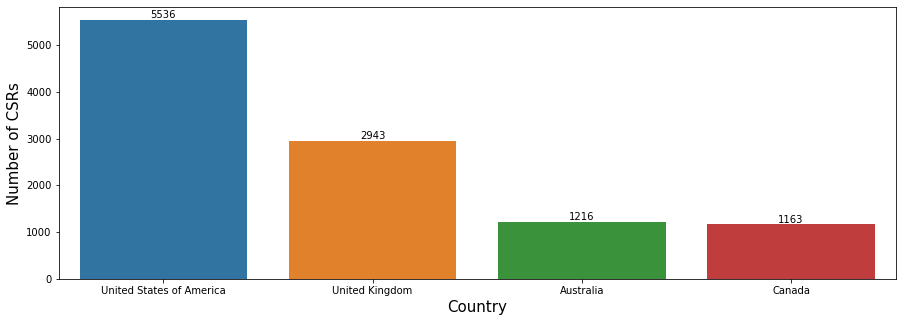

In [12]:
# Number of CSRs per country
xs = []
ys = []
for country in df['Country of Exchange'].unique():
    xs.append(country)
    ys.append(sum(df['Country of Exchange'] == country))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys, order = df['Country of Exchange'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of CSRs", fontsize=15)
plt.show()

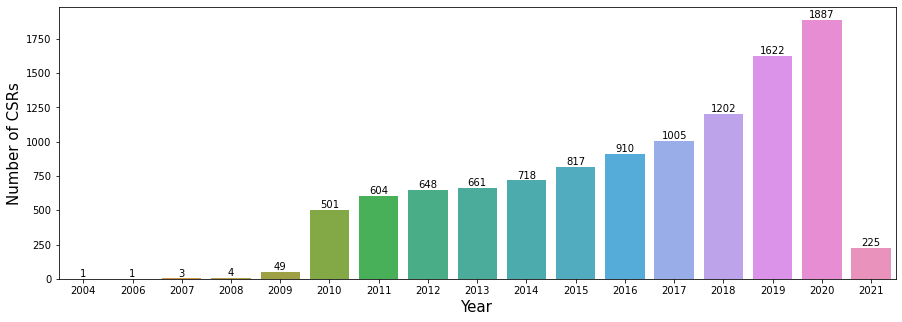

In [13]:
# Number of CSRs per year    
xs = []
ys = []
for year in np.sort(df['Financial Period Absolute'].unique()):
    xs.append(year)
    ys.append(sum(df['Financial Period Absolute'].astype(str) == str(year)))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of CSRs", fontsize=15)
plt.show()

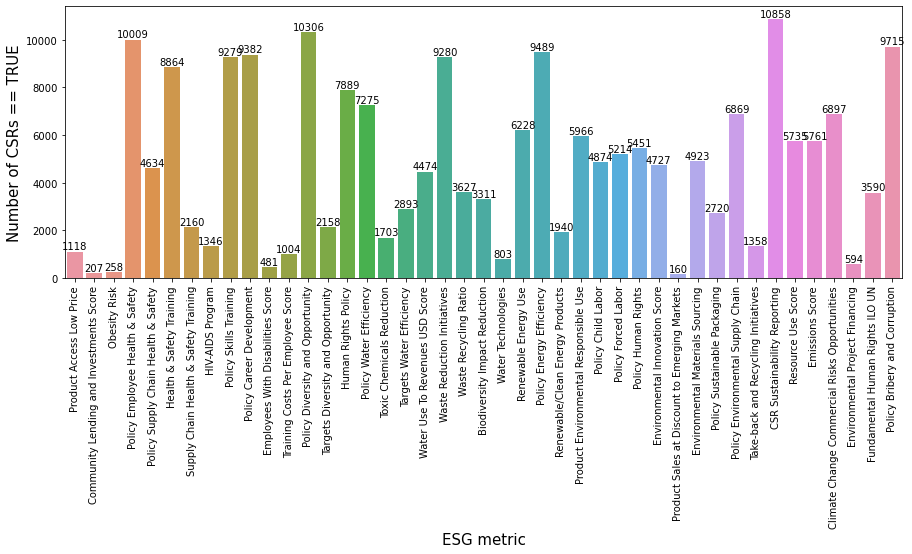

In [14]:
# Number of TRUE per ESG metric
xs = []
ys = []
for column in df.columns[8:]:
    xs.append(column)
    ys.append(sum(df[column] == True))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.xlabel("ESG metric", fontsize=15)
plt.ylabel("Number of CSRs == TRUE", fontsize=15)
plt.show()  

## 4. Map ESG metrics to SDGs
From NLP for SDGs paper: 
A company is designated as aligned with the respective SDG, depending on its score on the ESG metrics mapped to the SDG. If only one or two ESG metrics are mapped to the SDG, alignment requires a score on at least one, whereas if more than two metrics are mapped to the SDG, alignment requires a score for at least two.

For mapping table, see paper.

In [15]:
# Transform True/False to 1/0
for column in df.columns[8:]:
    df[column] = df[column].astype(int)

In [16]:
# Create one column per SDG of type bool
df['SDG_1'] = (df['Product Access Low Price'] + df['Community Lending and Investments Score']) > 0
df['SDG_2'] = (df['Obesity Risk'] == True)
df['SDG_3'] = (df['Policy Employee Health & Safety'] + df['Policy Supply Chain Health & Safety'] + df['Health & Safety Training'] + df['Supply Chain Health & Safety Training'] + df['HIV-AIDS Program']) > 1
df['SDG_4'] = (df['Policy Skills Training'] + df['Policy Career Development'] + df['Employees With Disabilities Score'] + df['Training Costs Per Employee Score']) > 1
df['SDG_5'] = (df['Policy Diversity and Opportunity'] + df['Targets Diversity and Opportunity'] + df['Human Rights Policy']) > 1
df['SDG_6'] = (df['Policy Water Efficiency'] + df['Toxic Chemicals Reduction'] + df['Targets Water Efficiency'] + df['Water Use To Revenues USD Score'] + df['Waste Reduction Initiatives'] + df['Waste Recycling Ratio'] + df['Biodiversity Impact Reduction'] + df['Water Technologies']) > 1
df['SDG_7'] = (df['Renewable Energy Use'] + df['Policy Energy Efficiency'] + df['Renewable/Clean Energy Products'] + df['Product Environmental Responsible Use']) > 1
df['SDG_8'] = (df['Human Rights Policy'] + df['Policy Child Labor'] + df['Policy Forced Labor'] + df['Employees With Disabilities Score'] + df['Policy Human Rights']) > 1
df['SDG_9'] = (df['Environmental Innovation Score'] + df['Community Lending and Investments Score'] + df['Product Sales at Discount to Emerging Markets']) > 1
df['SDG_10'] = np.nan
df['SDG_11'] = (df['Product Access Low Price'] == True)
# Removed 'CSR Sustainability Reporting'
df['SDG_12'] = (df['Environmental Materials Sourcing'] + df['Policy Water Efficiency'] + df['Policy Energy Efficiency'] + df['Policy Sustainable Packaging'] + df['Policy Environmental Supply Chain'] + df['Take-back and Recycling Initiatives'] + df['Waste Recycling Ratio'] + df['Resource Use Score'] + df['Emissions Score']) > 1
df['SDG_13'] = (df['Climate Change Commercial Risks Opportunities'] == True)
df['SDG_14'] = np.nan
df['SDG_15'] = (df['Biodiversity Impact Reduction'] + df['Environmental Project Financing']) > 0
df['SDG_16'] = (df['Human Rights Policy'] + df['Policy Child Labor'] + df['Fundamental Human Rights ILO UN'] + df['Policy Bribery and Corruption']) > 1
df['SDG_17'] = (df['Product Access Low Price'] == True)

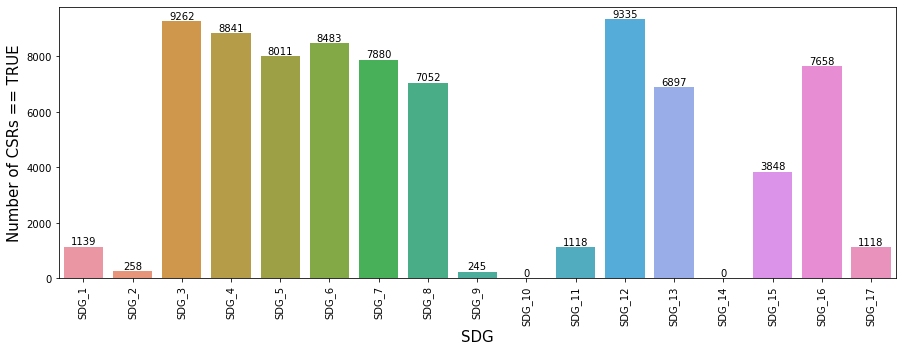

In [17]:
# Number of TRUE per SDG
xs = []
ys = []
for column in df.columns[51:]:
    xs.append(column)
    ys.append(sum(df[column] == True))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.xlabel("SDG", fontsize=15)
plt.ylabel("Number of CSRs == TRUE", fontsize=15)
plt.show()  

## 5. Create new df and store result in *reports_labeled*

In [18]:
# Select relevant columns
df_new = df[df.columns[:8].append(df.columns[51:])]
df

,Identifier,Company Name,ISIN,Ticker,Country of Exchange,Financial Period Absolute,Financial Period Relative,CSR URL,Product Access Low Price,Community Lending and Investments Score,Obesity Risk,Policy Employee Health & Safety,Policy Supply Chain Health & Safety,Health & Safety Training,Supply Chain Health & Safety Training,HIV-AIDS Program,Policy Skills Training,Policy Career Development,Employees With Disabilities Score,Training Costs Per Employee Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Human Rights Policy,Policy Water Efficiency,Toxic Chemicals Reduction,Targets Water Efficiency,Water Use To Revenues USD Score,Waste Reduction Initiatives,Waste Recycling Ratio,Biodiversity Impact Reduction,Water Technologies,Renewable Energy Use,Policy Energy Efficiency,Renewable/Clean Energy Products,Product Environmental Responsible Use,Policy Child Labor,Policy Forced Labor,Policy Human Rights,Environmental Innovation Score,Product Sales at Discount to Emerging Markets,Environmental Materials Sourcing,Policy Sustainable Packaging,Policy Environmental Supply Chain,Take-back and Recycling Initiatives,CSR Sustainability Reporting,Resource Use Score,Emissions Score,Climate Change Commercial Risks Opportunities,Environmental Project Financing,Fundamental Human Rights ILO UN,Policy Bribery and Corruption,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17
0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,1,1,0,1,1,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False
1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,YRI.TO,Yamana Gold Inc,CA98462Y1007,YRI,Canada,2010,FY-10,http://www.yamana.com/Theme/NewYamana/files/YAMANA%20CSR-E%2017-08-11b.pdf,0,0,0,1,0,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,False,False,True,True,False,True,True,False,False,NaN,False,True,True,NaN,True,True,False
11451,YUM.N,Yum! Brands Inc,US9884981013,YUM,United States of America,2010,FY-10,http://www.yum.com/responsibility/,0,0,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,False,False,True,True,True,True,True,False,False,NaN,False,True,False,NaN,False,True,False


In [19]:
# Rename columns (replace spaces by underscore)
columns_new = []
for column in df_new.columns:
    columns_new.append(column.replace(' ', '_'))
df_new.columns = columns_new
df

,Identifier,Company Name,ISIN,Ticker,Country of Exchange,Financial Period Absolute,Financial Period Relative,CSR URL,Product Access Low Price,Community Lending and Investments Score,Obesity Risk,Policy Employee Health & Safety,Policy Supply Chain Health & Safety,Health & Safety Training,Supply Chain Health & Safety Training,HIV-AIDS Program,Policy Skills Training,Policy Career Development,Employees With Disabilities Score,Training Costs Per Employee Score,Policy Diversity and Opportunity,Targets Diversity and Opportunity,Human Rights Policy,Policy Water Efficiency,Toxic Chemicals Reduction,Targets Water Efficiency,Water Use To Revenues USD Score,Waste Reduction Initiatives,Waste Recycling Ratio,Biodiversity Impact Reduction,Water Technologies,Renewable Energy Use,Policy Energy Efficiency,Renewable/Clean Energy Products,Product Environmental Responsible Use,Policy Child Labor,Policy Forced Labor,Policy Human Rights,Environmental Innovation Score,Product Sales at Discount to Emerging Markets,Environmental Materials Sourcing,Policy Sustainable Packaging,Policy Environmental Supply Chain,Take-back and Recycling Initiatives,CSR Sustainability Reporting,Resource Use Score,Emissions Score,Climate Change Commercial Risks Opportunities,Environmental Project Financing,Fundamental Human Rights ILO UN,Policy Bribery and Corruption,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17
0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,1,1,0,1,1,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False
1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,YRI.TO,Yamana Gold Inc,CA98462Y1007,YRI,Canada,2010,FY-10,http://www.yamana.com/Theme/NewYamana/files/YAMANA%20CSR-E%2017-08-11b.pdf,0,0,0,1,0,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,1,False,False,True,True,False,True,True,False,False,NaN,False,True,True,NaN,True,True,False
11451,YUM.N,Yum! Brands Inc,US9884981013,YUM,United States of America,2010,FY-10,http://www.yum.com/responsibility/,0,0,0,1,1,1,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,False,False,True,True,True,True,True,False,False,NaN,False,True,False,NaN,False,True,False


In [20]:
# Add column 'ID'
df_new.insert(loc=0, column='ID', value=df_new.index)
df_new

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,11450,YRI.TO,Yamana Gold Inc,CA98462Y1007,YRI,Canada,2010,FY-10,http://www.yamana.com/Theme/NewYamana/files/YAMANA%20CSR-E%2017-08-11b.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,True,NaN,True,True,False
11451,11451,YUM.N,Yum! Brands Inc,US9884981013,YUM,United States of America,2010,FY-10,http://www.yum.com/responsibility/,False,False,True,True,True,True,True,False,False,NaN,False,True,False,NaN,False,True,False


In [22]:
# Store as Excel file
df_new.to_excel('data/interim/reports_labeled.xlsx', index=False)